In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [14]:
filename = 'C:/Users/yuhan/nanospheres/Data/Monitoring/240328/Overnight/tt.mat'
data = sio.loadmat(filename)
print(data)

{'Tstart': array([[0.]]), 'Tinterval': array([[9.99999997e-07]]), 'ExtraSamples': array([[0]]), 'RequestedLength': array([[20000000]]), 'Length': array([[20000000]]), 'A': array([[1.6164082 ],
       [1.6164082 ],
       [1.6164082 ],
       ...,
       [0.07508241],
       [0.04608717],
       [0.06928336]], dtype=float32), 'B': array([[1.0194116 ],
       [1.0569527 ],
       [1.0252106 ],
       ...,
       [0.8520022 ],
       [0.8576486 ],
       [0.83750457]], dtype=float32), 'C': array([[0.10682456],
       [0.10682456],
       [0.10392503],
       ...,
       [0.12132218],
       [0.11842266],
       [0.12132218]], dtype=float32), 'F': array([[0.61237943],
       [0.61360025],
       [0.61360025],
       ...,
       [0.61237943],
       [0.61237943],
       [0.61360025]], dtype=float32), 'H': array([[-0.05554877],
       [-0.13078378],
       [-0.10484068],
       ...,
       [-0.12788427],
       [-0.06134782],
       [-0.04120376]], dtype=float32), 'Version': array(['6', '.',

In [6]:
folder = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240328/x/Phase/'
filenames = ['250', '280', '220', '190', '160']
end = '.mat'

In [8]:
filename = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240328/x/Phase/cal.mat'
data = sio.loadmat(filename)
z = np.transpose(data['B'])[0]
PSDz = scisig.welch(z, fs = 1000000, nperseg = 100000)
print(data)

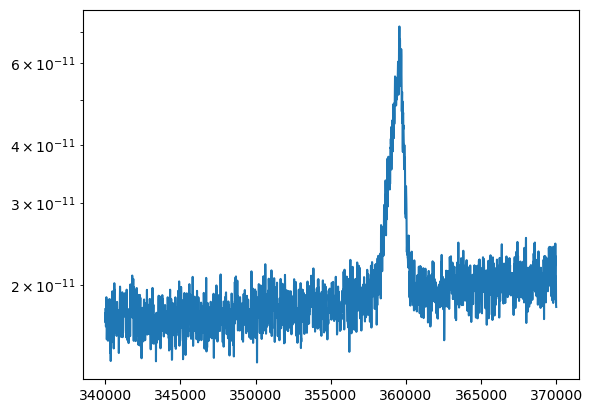

In [9]:
lb = int(0.1*340000)
ub = int(0.1*370000)
plt.plot(PSDz[0][lb:ub], PSDz[1][lb:ub])
plt.yscale('log')

In [10]:
def line(x, a, b):
    return a*x + b

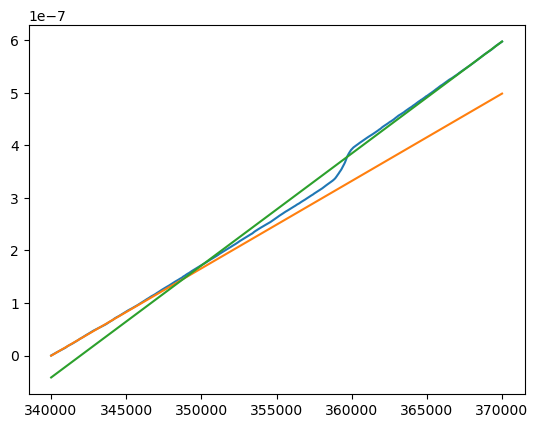

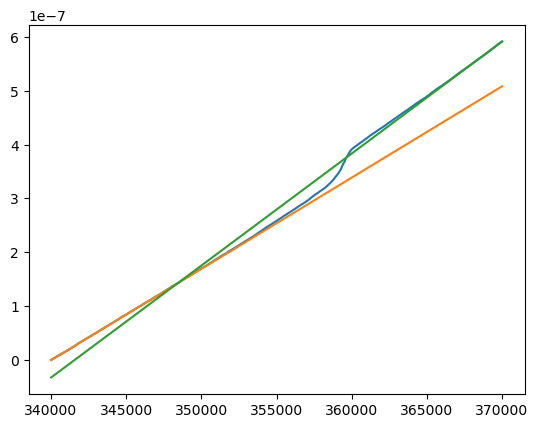

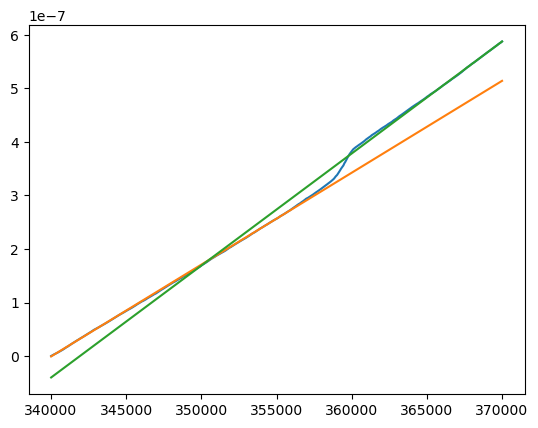

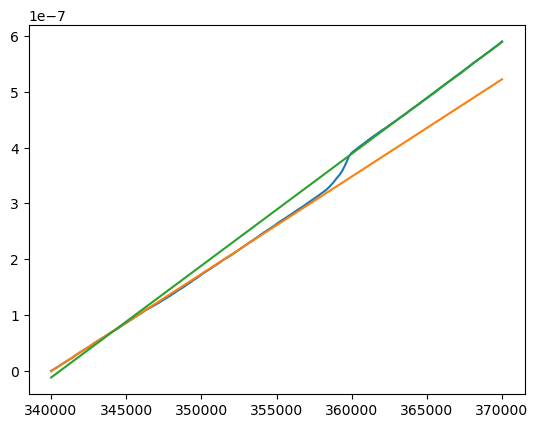

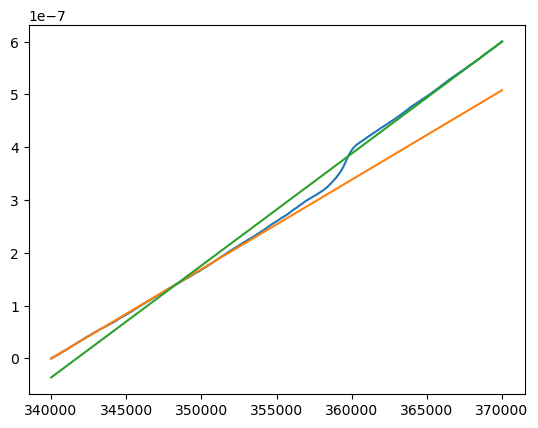

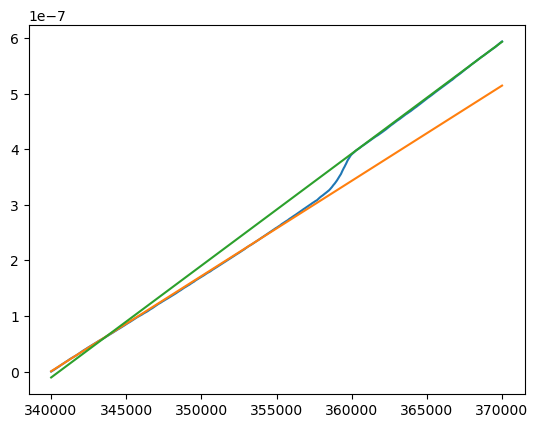

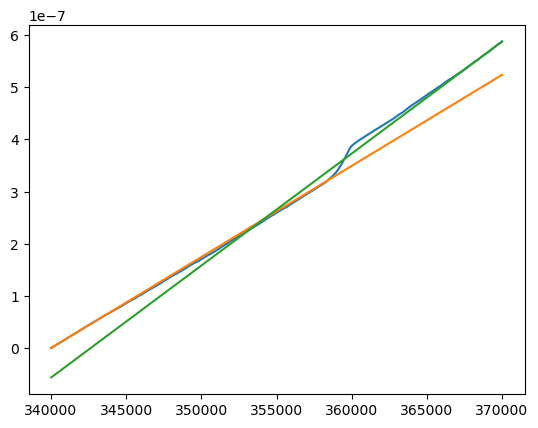

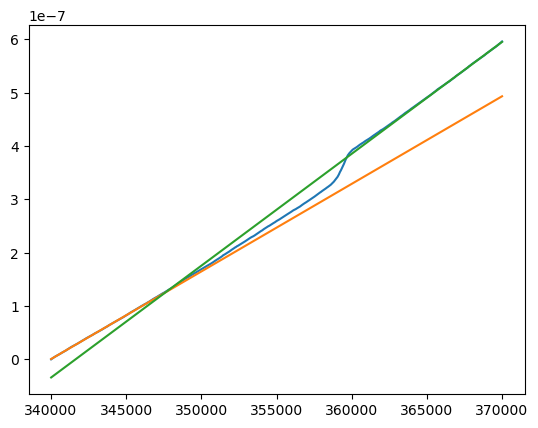

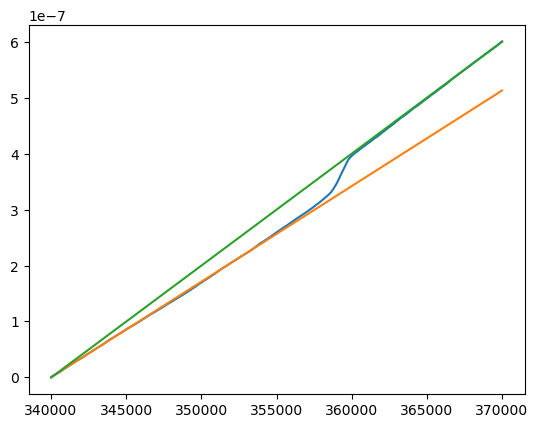

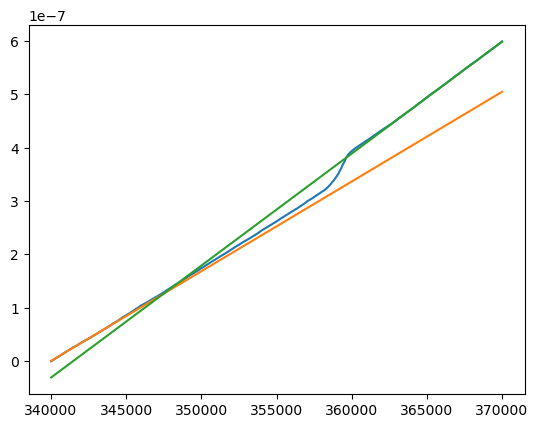

In [11]:
area_fin = []
for i in range(10):
    freq = np.linspace((lb+1)*10, ub*10, ub-lb-1)
    PSD = scisig.welch(z[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**5)
    areas = []
    for j in range(1, ub-lb):
        area = np.trapz(PSD[1][lb:lb+j], PSD[0][lb:lb+j])
        areas.append(area)
 
    fit1, cov1 = opt.curve_fit(line, freq[:400], areas[:400], p0 = [3*10**(-10), -1.2*10**(-5)])
    fit2, cov2 = opt.curve_fit(line, freq[-200:], areas[-200:], p0 = [3*10**(-10), 3.78*10**(-4)])
    line1 = line(freq[:], *fit1)
    line2 = line(freq[:], *fit2)
    plt.figure()
    plt.plot(freq[:], areas[:])
    plt.plot(freq, line1)
    plt.plot(freq, line2)
    area_fin.append(line2[2400]-line1[2400])
    #area_fin.append(fit2[1]-fit1[1])
area_mean_cal1 = np.mean(area_fin)
area_err_cal1 = np.std(area_fin)

In [703]:
area_mean_cal1

0.00015478539541307943

In [704]:
filename = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240319/z/Gain/cal2.mat'
data = sio.loadmat(filename)
z = np.transpose(data['C'])[0]
PSDz = scisig.welch(z, fs = 1000000, nperseg = 100000)

In [726]:
area_fin = []
for i in range(10):
    freq = np.linspace((lb+1)*10, ub*10, ub-lb-1)
    PSD = scisig.welch(z[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**5)
    areas = []
    for j in range(1, ub-lb):
        area = np.trapz(PSD[1][lb:lb+j], PSD[0][lb:lb+j])
        areas.append(area)
 
    fit1, cov1 = opt.curve_fit(line, freq[:200], areas[:200], p0 = [3*10**(-10), -1.2*10**(-5)])
    fit2, cov2 = opt.curve_fit(line, freq[-200:], areas[-200:], p0 = [3*10**(-10), 3.78*10**(-4)])
    line1 = line(freq[:], *fit1)
    line2 = line(freq[:], *fit2)
    #plt.figure()
    #plt.plot(freq[:], areas[:])
    #plt.plot(freq, line1)
    #plt.plot(freq, line2)
    area_fin.append(line2[2400]-line1[2400])
    #area_fin.append(fit2[1]-fit1[1])
area_mean_cal2 = np.mean(area_fin)
area_err_cal2 = np.std(area_fin)

In [706]:
area_mean_cal2

0.00014734384621984905

C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240321/y/Phase/215.mat
C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240321/y/Phase/245.mat
C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240321/y/Phase/275.mat
C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240321/y/Phase/185.mat
C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240321/y/Phase/155.mat


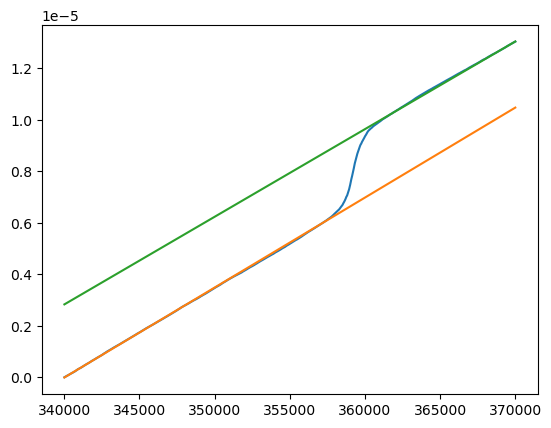

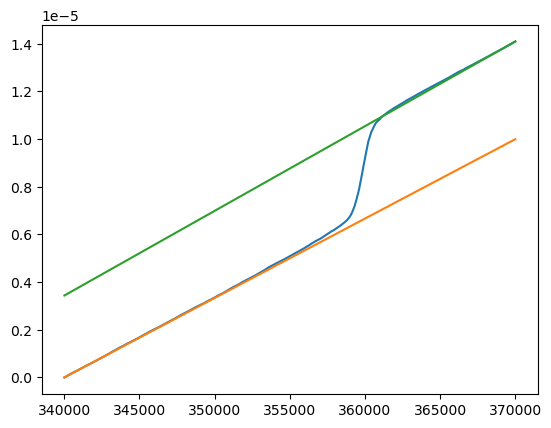

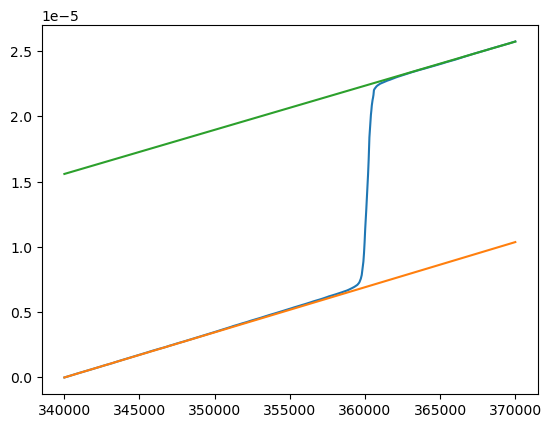

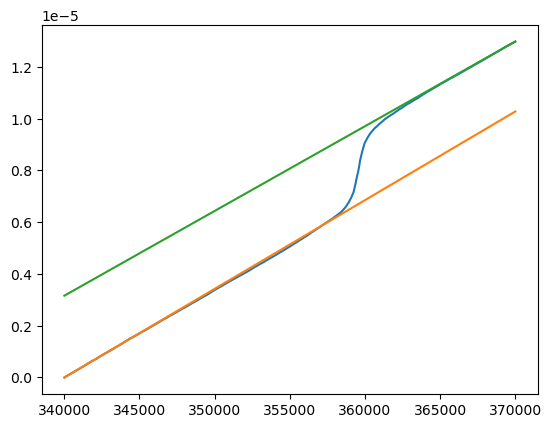

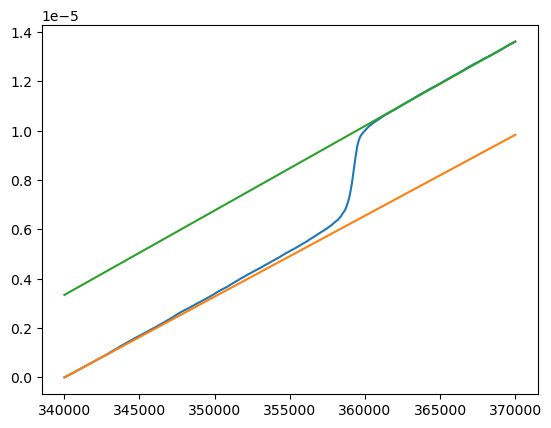

In [782]:
Ts = []
Ts_err = []
for k in filenames:
    filename = folder + k + end
    print(filename)
    data = sio.loadmat(filename)
    z = np.transpose(data['A'])[0]
    PSDz = scisig.welch(z, fs = 2000000, nperseg = 100000)
    area_fin = []
    for i in range(10):
        freq = np.linspace((lb+1)*10, ub*10, ub-lb-1)
        PSD = scisig.welch(z[i*10**6:(i+1)*10**6], fs = 10**6, nperseg = 10**5)
        areas = []
        for j in range(1, ub-lb):
            area = np.trapz(PSD[1][lb:lb+j], PSD[0][lb:lb+j])
            areas.append(area)
    
        fit1, cov1 = opt.curve_fit(line, freq[:200], areas[:200], p0 = [3*10**(-10), -1.2*10**(-5)])
        fit2, cov2 = opt.curve_fit(line, freq[-100:], areas[-100:], p0 = [3*10**(-10), 3.78*10**(-4)])
        line1 = line(freq[:], *fit1)
        line2 = line(freq[:], *fit2)
        if i == 0:
            plt.figure()
            plt.plot(freq[:], areas[:])
            plt.plot(freq, line1)
            plt.plot(freq, line2)
        area_fin.append(line2[1900]-line1[1900])
    area_mean = np.mean(area_fin)
    area_err = np.std(area_fin)
    Ts.append(area_mean)
    Ts_err.append(area_err)

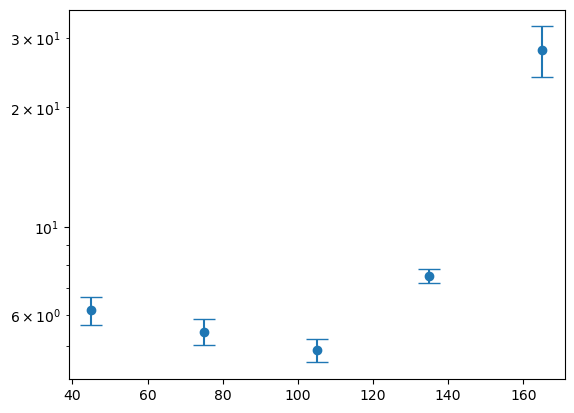

In [783]:
phase = [105, 135, 165, 75, 45]
plt.figure()
plt.errorbar(phase, Ts/area_mean_cal1*293, yerr = Ts_err/area_mean_cal1*293, linestyle = 'None', marker = 'o', capsize = 8)
plt.yscale('log')
#plt.xscale('log')

In [713]:
save_lib = {'phase': phase, 'areas': Ts, 'areas_err':Ts_err, 'cal1':area_mean_cal1, 'cal1_err':area_err_cal1, 'cal2':area_mean_cal2, 'cal2_err':area_err_cal2}

In [712]:
filename = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240319/z/Gain/analysed.mat'
sio.savemat(filename, save_lib)

In [4]:
filename1 = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240319/z/Phase/analysed.mat'
filename2 = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240319/z/Phase 2/analysed.mat'
filename3 = 'C:/Users/yuhan/nanospheres/Data/Cooling/Finding parameters/240319/z/Phase 3/analysed.mat'

In [5]:
data1 = sio.loadmat(filename1)
data2 = sio.loadmat(filename2)
data3 = sio.loadmat(filename3)

In [6]:
yerr1 = np.sqrt((data1['areas_err'][0]/data1['areas'][0])**2+(data1['cal1_err'][0]/data1['cal1'][0])**2)*data1['areas'][0]/data1['cal1'][0]*293
yerr2 = np.sqrt((data2['areas_err'][0]/data2['areas'][0])**2+(data2['cal1_err'][0]/data2['cal1'][0])**2)*data2['areas'][0]/data2['cal1'][0]*293
yerr3 = np.sqrt((data3['areas_err'][0]/data3['areas'][0])**2+(data3['cal1_err'][0]/data3['cal1'][0])**2)*data3['areas'][0]/data2['cal1'][0]*293

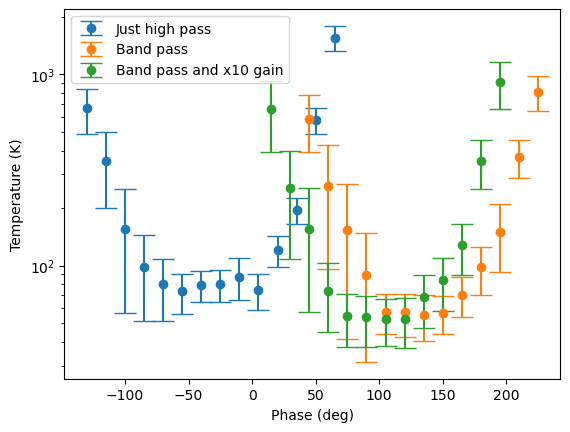

In [8]:
plt.errorbar(data1['phase'][0], data1['areas'][0]/data1['cal1'][0]*293, yerr = yerr1, linestyle = 'None', marker = 'o', capsize = 8, label = 'Just high pass')
plt.errorbar(data2['phase'][0], data2['areas'][0]/data2['cal1'][0]*293, yerr =yerr2, linestyle = 'None', marker = 'o', capsize = 8, label = 'Band pass')
plt.errorbar(data3['phase'][0], data3['areas'][0]/data3['cal1'][0]*293, yerr =yerr3, linestyle = 'None', marker = 'o', capsize = 8, label = 'Band pass and x10 gain')
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('Temperature (K)')
plt.xlabel('Phase (deg)')
plt.legend()

In [687]:
filename = 'C:/Users/yuhan/nanospheres/Data/Charging/Lock in/240320/Comparison/Comparison_1.mat'
foo = sio.loadmat(filename)

In [688]:
1/foo['Tinterval']

array([[200000.00505243]])